TIME IN SECONDS 1 g-g diagram 118.90010494397866


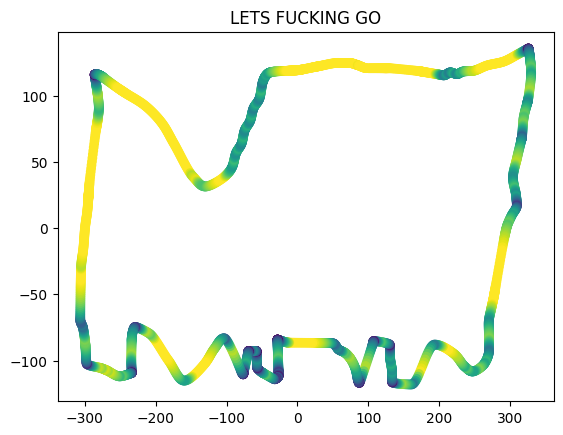

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv("endurance_michigan_2019-easy_driver.csv")
plt.scatter(x=df2["x"],y=df2["y"], c=df2["vel"]/70, cmap="viridis")
plt.title("LETS FUCKING GO")
# sns.set_style("whitegrid")
# pal = sns.color_palette("Reds", as_cmap=True)
# sns.relplot(data=df, x="x", y="y", hue="vel", palette="RdYlBu") #, palette="dark:viridis") #, palette="viridis") # kind="line")
print("TIME IN SECONDS 1 g-g diagram",df2.loc[df2.shape[0]-1, "time"])

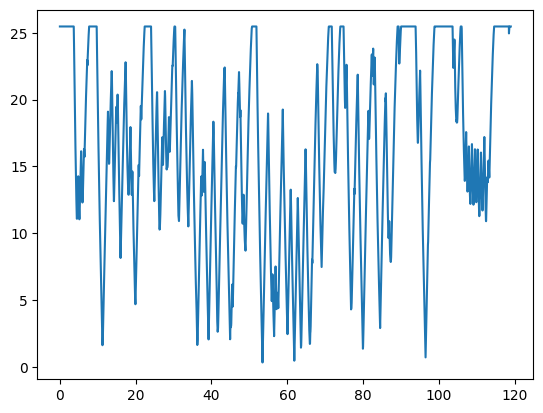

In [16]:
plt.plot(df2["time"], df2["vel"])


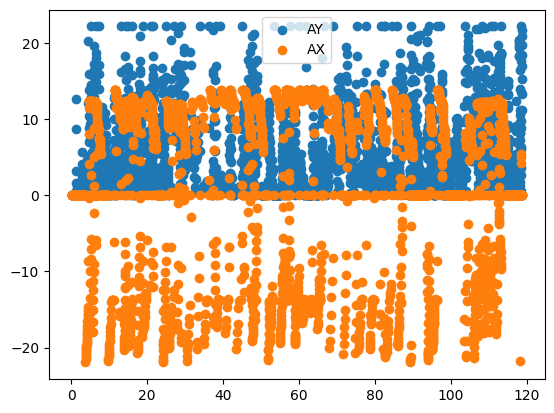

In [17]:
plt.scatter(df2["time"], df2["ay"], label = "AY")
plt.scatter(df2["time"], df2["ax"], label = "AX")
plt.legend()

TIME IN SECONDS 1 g-g diagram 48.92504235298788


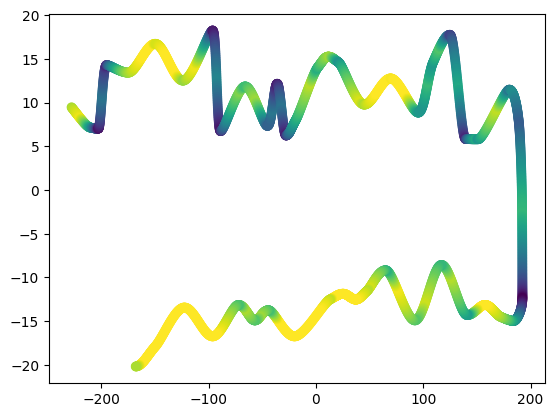

In [18]:
df = pd.read_csv("autocross_michigan_2019-easy_driver.csv")
plt.scatter(x=df["x"],y=df["y"], c=df["vel"]/70, cmap="viridis")
print("TIME IN SECONDS 1 g-g diagram",df.loc[df.shape[0]-1, "time"])

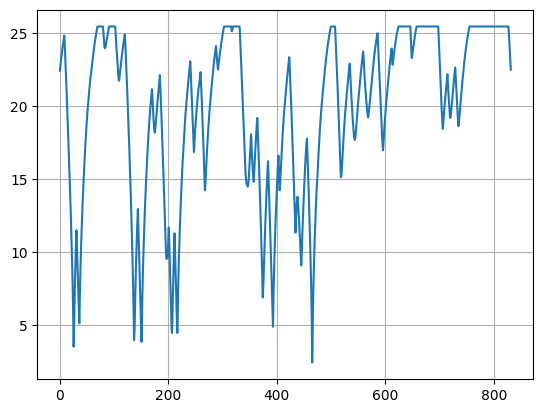

In [19]:
plt.plot(df["pos"], df["vel"])
plt.grid()

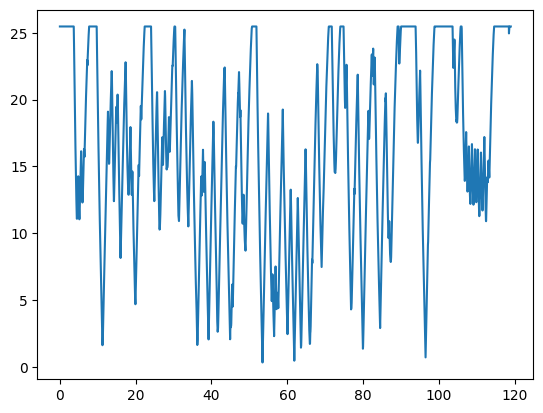

In [20]:
plt.plot(df2["time"], df2["vel"])

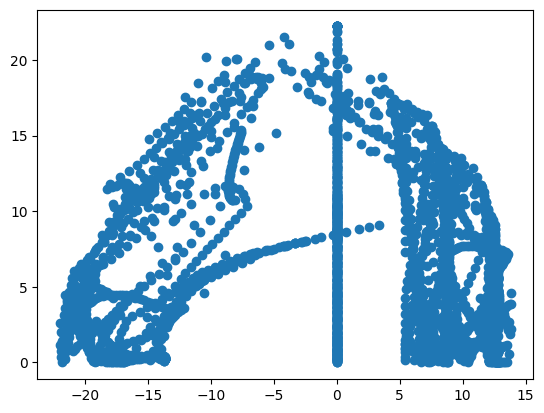

In [21]:
plt.scatter(df["ax"],df["ay"])

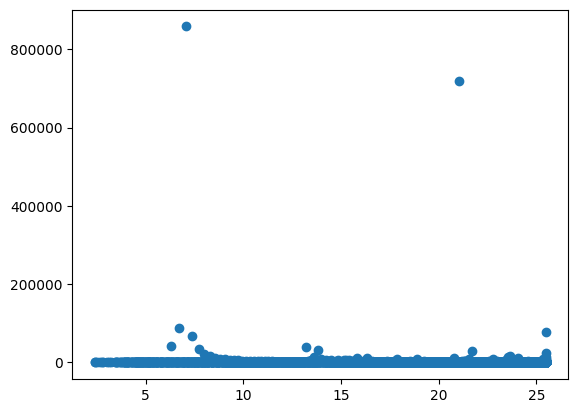

In [22]:
plt.scatter(df["vel"],df["R"])